# XOR binary classification problem

In [1]:
import sys
import os
import random
import csv
from pprint import pprint

from matplotlib import pyplot as plt

module_path = os.path.abspath("..")
sys.path.append(module_path)

from perceptron.model import Model, cross_validation
from perceptron.layer import Layer
from perceptron.activation import Sigmoid


In [2]:
features = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]
targets = [[0], [1], [1], [0]]


# Single layer model

Training: 100% |████████████████████████████████████████| 2500/2500, binary_accuracy=0.5 


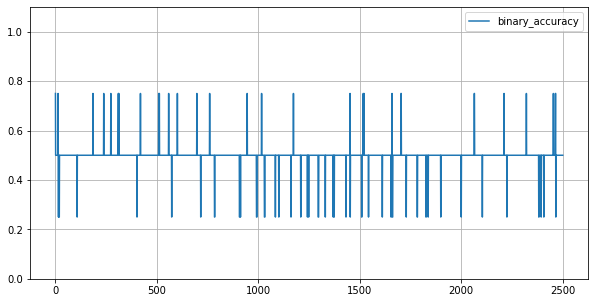

In [3]:
random.seed(0)

model = Model()
model.add(Layer(input_size=2, layer_size=1))
model.compile("GD")

epochs = 2500
history = model.train(
    training_inputs=features,
    training_targets=targets,
    epochs=epochs,
    loss_function="binary_crossentropy",
    batch_size=1,
    base_learning_rate=0.01,
    learning_rate_decay=None,
    metrics="binary_accuracy",
)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

ax.plot(range(epochs + 1), history["binary_accuracy"], label="binary_accuracy")

ax.set_ylim(bottom=0, top=1.1)
ax.grid()
ax.legend()
plt.show()


# Multi-layer model

Training: 100% |████████████████████████████████████████| 2500/2500, binary_accuracy=1   


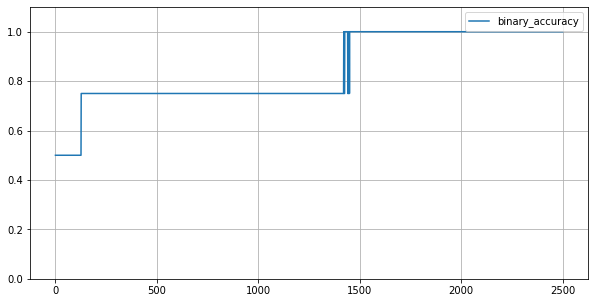

In [4]:
random.seed(0)

model = Model()
model.add(Layer(input_size=2, layer_size=8))
model.add(Sigmoid())
model.add(Layer(input_size=8, layer_size=1))
model.compile("GD")

epochs = 2500
history = model.train(
    training_inputs=features,
    training_targets=targets,
    epochs=epochs,
    loss_function="mae",
    batch_size=1,
    base_learning_rate=0.01,
    learning_rate_decay=None,
    metrics="binary_accuracy",
)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

ax.plot(range(epochs + 1), history["binary_accuracy"], label="binary_accuracy")

ax.set_ylim(bottom=0, top=1.1)
ax.grid()
ax.legend()
plt.show()
